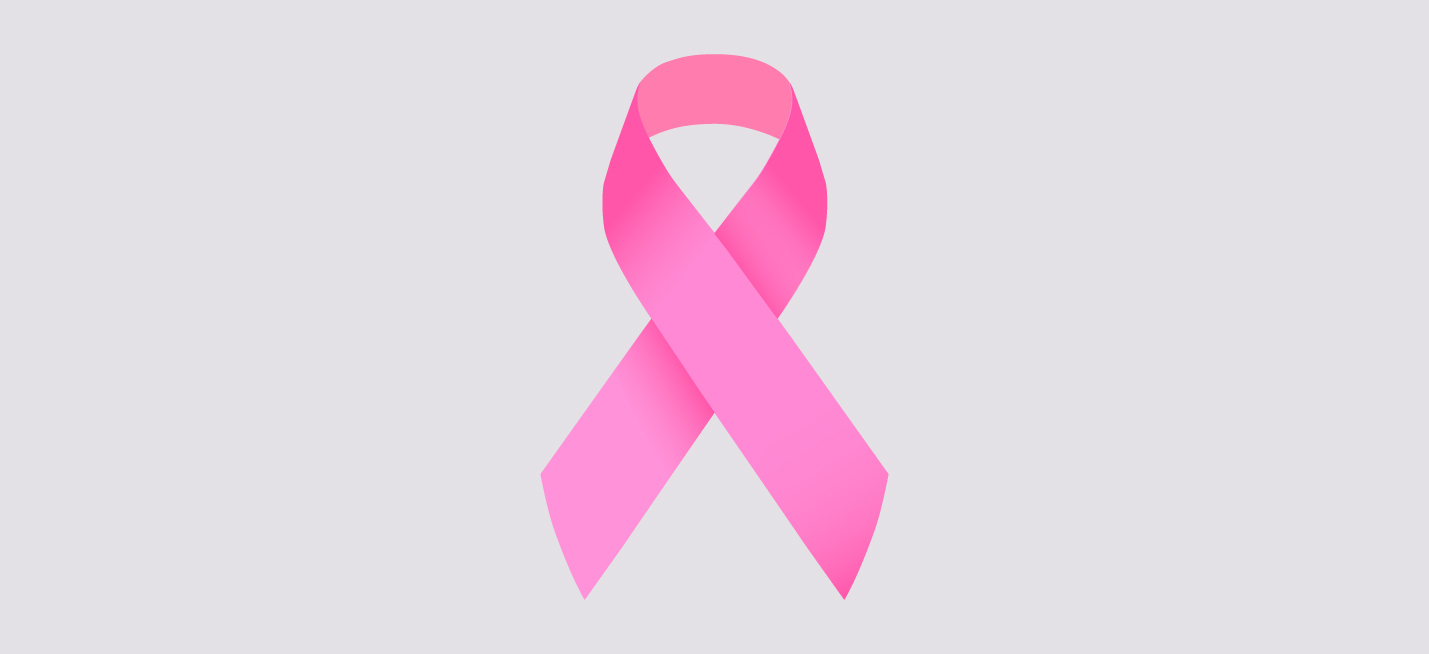


# Predicting over Malignant and Benign Breast Cancer

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")
data

# Cleaning data

Dropping non neccesary data and transforming target column into numeric binary classification.

In [ ]:
data.drop(['Unnamed: 32',"id"], axis=1, inplace=True)
data["diagnosis"] = [1 if row == 'M' else 0 for row in data['diagnosis']]
y = data["diagnosis"].values
data.drop('diagnosis',axis=1, inplace=True)

# Checking some metrics

In [ ]:
data.describe()

# Displaying heatmap

Observing correlation between features.

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

# Normalizing data

Organize the data into logical groups, in such a way that each group describes a small part of the whole. Minimize the amount of duplicate data stored in a database.

In [ ]:
norm_data = (data - np.min(data)) / (np.max(data) - np.min(data)).values

In [ ]:
norm_data.shape

# Splitting data

Using scikit-learn function train_test_split to prepare data for training and future predictions.

Train = 80%

Test = 20%

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(norm_data, y, test_size=0.20, random_state=4)

print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

# Logistic Regression

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).



In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced', max_iter=25)
lr.fit(X_train, y_train)
print(lr.classes_)
print('Coefficient of the features in the decision function: ', lr.coef_)

In [ ]:
predictions = lr.predict(X_test)

# Finding Best Score

Importing accuracy_score and roc_auc_score functions from scikit-learn library.

The model has an accuracy of 96.5% on accuracy_score function and 97.5% on roc_auc_score function.

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score
accuracy_score = accuracy_score(predictions, y_test)
auc = roc_auc_score(y_test, predictions)

print('accuracy_score: {}  %'.format(accuracy_score*100))
print('auc: {}  %'.format(auc*100))

# Plotting Confusion Matrix

The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.

1 = Malignant Cancer,   0 = Benign Cancer

True Positive: total number of predictions match the actual number of Malignant Breast Cancer.

True Negative: 95% of predictions match the actual number of Benign Breast Cancer.

False Positive: 5% of predictions don't match the actual number of Benign Breast Cancer.

False Negative: No bad predictions on Malignant Breast Cancer.

In [ ]:
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(lr, X_test,y_test, display_labels=lr.classes_, cmap="YlGnBu", normalize='true', ax=ax)